In [1]:
import networkx as nx
from graphviz import Graph
from itertools import product, groupby, permutations
import os
import copy

from IPython.display import display

from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.16.0.post0

In [2]:
def DFS(graph, node, visited, ret, counter):
    counter = counter + 1
    if node not in visited:
        ret += [node]
        visited.add(node)
        res = [n for n in graph.neighbors(node)]
        res.sort()
        for neighbour in res:
            DFS(graph, neighbour, visited, ret, counter)
    if counter == 1 and len(ret) != len(graph.nodes):
        counter = 0
        nodes = list(set([n for n in graph.nodes]).symmetric_difference(visited))
        nodes.sort()
        DFS(graph, nodes[0], visited, ret, counter)
        
    return ret


def remove_dups(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

def remove_one(seq):
    return [x for x in seq if not (x==1)]

def BFS(graph, node):
    res = [n for n in graph.neighbors(node)]
    res.sort()
    visited = [node]
    ret = [node] + res
    
    for item in res:
        visited.append(item)
    
    while len(ret) != len(graph.nodes):
        res1 = []
        for item in res:
            temp = [n for n in graph.neighbors(item) if n not in visited]
            res1 += temp
            for item in temp:
                visited.append(item)

        if res1:
            res1.sort()
            res = res1
            ret += res
        else:
            nodes = list(set([n for n in graph.nodes]).symmetric_difference(visited))
            if not nodes:
                break
            nodes.sort()
            ret += [nodes[0]]
            visited.append(nodes[0])
            
            res = [n for n in graph.neighbors(nodes[0])]
            res.sort()
            for item in res:
                visited.append(item)
                
            ret += res

    return ret
    
    
def display_graph(my_graph, file_name, title1):
    
    to_display = []
    for edge in my_graph.edges:
        to_display += [list(edge)]
        
    G = Graph(title1, filename=file_name + ".gv")
    G.attr(rankdir='LR', size='20,12')
    G.attr('node', shape='doublecircle', style='filled', fillcolor='red')
    G.node('1')
    G.attr('node', shape='circle', style='unfilled')

    for edge in to_display:
        G.edge(str(edge[0]), str(edge[1]), color="1 0.05 .85")


    print()
    print()
    print()
    print("Original Graph")
    display(G)
    #G.view()
    
    

If you are given a sequence [1, 6, 7, 3, 5, 4, 9, 8, 2] then
the only graphs that are solutions to the
sequence must be a subset of the graph below



Original Graph


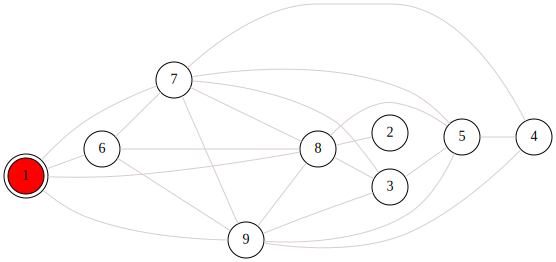

[[1, 6], [1, 7], [1, 9], [1, 8], [6, 7], [6, 9], [6, 8], [7, 3], [7, 5], [7, 4], [7, 9], [7, 8], [3, 5], [3, 9], [3, 8], [5, 4], [5, 9], [5, 8], [4, 9], [9, 8], [8, 2]]





In [48]:
from_dfs = [1, 4, 7, 3, 5, 6, 9, 8, 2]
from_dfs = [1, 4, 2, 3, 5, 6, 9, 8, 7] #same as above, except more forgiving
from_dfs = [1, 2, 3, 4, 5, 6, 7, 8, 9] #k-complete graph
from_dfs = [1, 9, 8, 7, 6, 5, 4, 3, 2] #line graph
from_dfs = [1, 6, 7, 3, 5, 4, 9, 8, 2]

used = [1]
edges = []
spot = 1


def msf(seq):
    edges = []
    seq_loop = seq[1:]
    
    for i,item in enumerate(seq_loop):
        pot_matches = [n for n in seq_loop[i:] if n>=item]
        for match in pot_matches:
            edges.append([seq[i], match])
            
    print(f"If you are given a sequence {seq} then")
    print("the only graphs that are solutions to the")
    print("sequence must be a subset of the graph below")
    G = nx.MultiGraph()
    for edge in edges:
        G.add_edge(edge[0], edge[1])
    display_graph(G, "first try", "title")
    print(edges)
    print("\n\n")



def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


def mst_generator(spot, seq, edges, used):
        
    used_reset = copy.deepcopy(used)
    edges_reset = copy.deepcopy(edges)
    
    starting_node = seq[spot]

    pot_matches = []
    for item in seq[spot:]:
        if item not in used and item>=starting_node:
            pot_matches.append(item)
        elif item in used:
            break
    
    if len(pot_matches)==1:
        all_combs = [[0]]
    else:
        all_combs = list(product([0,1], repeat=len(pot_matches)-1))
    for comb in all_combs:
        
        test = [seq[spot]]
        for i,item in enumerate(comb):
            if item:
                test.append(seq[spot+i+1])
        if not all(test[n] <= test[n+1] for n in range(len(test) - 1)):
            continue

        used.extend(test)
        for i in test:
            edges.append([seq[spot-1], i])

        if len(used) == len(seq):
            return
        new_spot = [n for n in seq[spot+1:] if n not in used][0]
        new_spot = seq.index(new_spot)
        
        mst_generator(new_spot, seq, edges, used)

        if len(used)==len(seq):
            G = nx.MultiGraph()
            for edge in edges:
                G.add_edge(edge[0], edge[1])
            display_graph(G, "first try", "title")
            print(edges)
            print("\n\n")


        for i in range(1, 1 + len(used)-len(used_reset)):
            del used[-1]
        for i in range(len(used_reset)):
            used[i] = used_reset[i]
            
        for i in range(1, 1 + len(edges)-len(edges_reset)):
            del edges[-1]
        for i in range(len(edges_reset)):
            edges[i] = edges_reset[i]
                
            
            
#mst_generator(spot, from_dfs, edges, used)
msf(from_dfs)
from_dfs = [1, 6, 7, 3, 5, 4, 9, 8, 2]





Original Graph


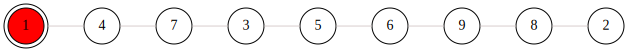




Original Graph


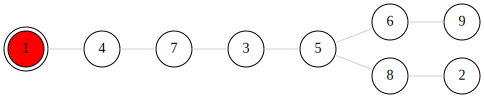




Original Graph


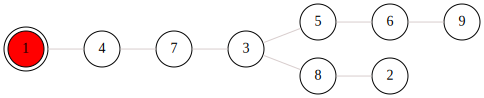




Original Graph


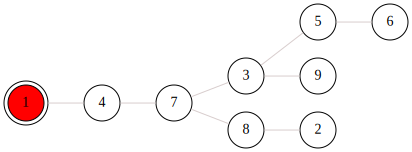




Original Graph


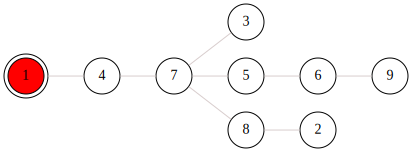




Original Graph


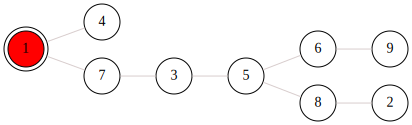




Original Graph


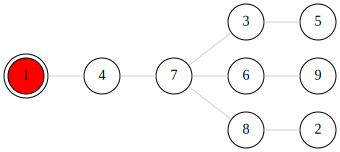




Original Graph


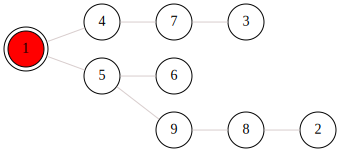



Combined Graph



Original Graph


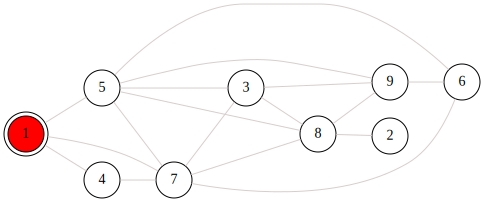

In [37]:
#Trying out some examples of MST being added together to see if
#it preserves DFS

from_dfs = [1, 4, 7, 3, 5, 6, 9, 8, 2]

all_edges = []
all_edges.append([[1, 4], [4, 7], [7, 3], [3, 5], [5, 6], [6, 9], [9, 8], [8, 2]])
all_edges.append([[1, 4], [4, 7], [7, 3], [3, 5], [5, 6], [5, 8], [6, 9], [8, 2]])
all_edges.append([[1, 4], [4, 7], [7, 3], [3, 5], [3, 8], [5, 6], [6, 9], [8, 2]])
all_edges.append([[1, 4], [4, 7], [7, 3], [7, 8], [3, 5], [3, 9], [5, 6], [8, 2]])
all_edges.append([[1, 4], [4, 7], [7, 3], [7, 5], [7, 8], [5, 6], [6, 9], [8, 2]])
all_edges.append([[1, 4], [1, 7], [7, 3], [3, 5], [5, 6], [5, 8], [6, 9], [8, 2]])
all_edges.append([[1, 4], [4, 7], [7, 3], [7, 6], [7, 8], [3, 5], [6, 9], [8, 2]])
all_edges.append([[1, 4], [1, 5], [4, 7], [7, 3], [5, 6], [5, 9], [9, 8], [8, 2]])

for edges in all_edges:
    G = nx.MultiGraph()
    for edge in edges:
        G.add_edge(edge[0], edge[1])
    display_graph(G, "first try", "title")
    
    
comb_edges = []
for edges in all_edges:
    comb_edges += edges
comb_edges.sort()
comb_edges = list(comb_edges for comb_edges,_ in groupby(comb_edges))
print("\n\nCombined Graph")
G = nx.MultiGraph()
for edge in comb_edges:
    G.add_edge(edge[0], edge[1])
display_graph(G, "first try", "title")



In [3]:
%%manim -qm DFS_Solver_Vid

class DFS_Solver_Vid(Scene):
        
    def add_label(self, g, node_labels, node, label_val, scale_factor):
        
        node_labels["BLACK"][node] = [MathTex(f"{label_val}", font_size=30/scale_factor,
                                              color=BLACK).move_to(g[node].get_center()),
                                      label_val]
        
        return


    def single_msf_manim(self, seq):
        
        node_labels = {"BLACK": {}}
        
        num_nodes = len(seq)
        scale_factor = num_nodes/8
        my_edges = []
        for i in range(num_nodes-1):
            my_edges.append((seq[i], seq[i+1]))
        
        
        g = Graph(seq, my_edges, layout="spring", layout_scale=4, vertex_config={'radius': 0.30/scale_factor},
                  labels=False, root_vertex=1)
        
        for i in range(1, num_nodes+1):
            g[i].move_to([(i-(num_nodes/2))/scale_factor, 0, 0])

        self.play(Create(g))
        
        for_eval = "self.play("
        for i in range(num_nodes):
            self.add_label(g, node_labels, i+1, seq[i], scale_factor)
            for_eval += f"node_labels[\"BLACK\"][{i+1}][0].animate,"
        eval(for_eval[:-1]+")")
            
        self.wait(2)
        
        angle_=-PI
        this_color=0
        seq_loop = seq[1:]
        for i,item in enumerate(seq_loop):
            pot_matches = [n for n in seq_loop[i:] if n>=item]
            if len(pot_matches)>0 and angle_>0:
                this_color = (this_color+1) % 4
            angle_ *= -1
            for match in pot_matches:
                start_=i+1
                end_=seq.index(match)+1
                if start_==end_-1:
                    continue
                center_= (g[start_].get_center()[0] + g[end_].get_center()[0])/2
                radius_= abs(g[start_].get_center()[0] - g[end_].get_center()[0])/2
                this_arc = Arc(start_angle=PI, angle=angle_, arc_center=[center_, 0, 0], radius=radius_)
                if this_color==0:
                    this_arc.color = RED
                elif this_color==1:
                    this_arc.color = BLUE
                elif this_color==2:
                    this_arc.color = GREEN
                elif this_color==3:
                    this_arc.color = YELLOW
                    
                this_arc.z_index=-1
                self.play(Create(this_arc))

                
        
        
    def msf_family_manim(self, size, num_of_perm, reverse=False):

        sum_of=0
        
        totally_sorted_bro = []
        for i in range(size):
            if reverse:
                totally_sorted_bro.append(size-i)
            else:
                totally_sorted_bro.append(i+1)

        counter = 0
        for seq in permutations(totally_sorted_bro):
            counter+=1
            if counter > num_of_perm:
                return
            
            self.next_section(skip_animations=True)
            
            node_labels = {"BLACK": {}}

            num_nodes = len(seq)
            scale_factor = num_nodes/8
            my_edges = []
            for i in range(num_nodes-1):
                my_edges.append((seq[i], seq[i+1]))
                
                
            g = Graph(seq, my_edges, layout="spring", layout_scale=4, vertex_config={'radius': 0.30/scale_factor},
                      labels=False, root_vertex=1)

            for i in range(1, num_nodes+1):
                g[i].move_to([(i-(num_nodes/2))/scale_factor, 0, 0])

            self.play(Create(g),run_time=0)

            for_eval = "self.play("
            for i in range(num_nodes):
                self.add_label(g, node_labels, i+1, seq[i], scale_factor)
                node_labels["BLACK"][i+1][0].z_index=-1
                for_eval += f"node_labels[\"BLACK\"][{i+1}][0].animate,"


            angle_=-PI
            this_color=0
            seq_loop = seq[1:]
            arcs = []
            n = 0
            for i,item in enumerate(seq_loop):
                pot_matches = [n for n in seq_loop[i:] if n>=item]
                this_color = (this_color+1) % 4
                
                for match in pot_matches:
                    start_=i+1
                    end_=seq.index(match)+1
                    if start_==end_-1:
                        continue
                    center_= (g[start_].get_center()[0] + g[end_].get_center()[0])/2
                    radius_= abs(g[start_].get_center()[0] - g[end_].get_center()[0])/2
                    arcs.append(Arc(start_angle=PI, angle=-PI, arc_center=[center_, 0, 0], radius=radius_))
                    if this_color==0:
                        arcs[-1].color = RED
                    elif this_color==1:
                        arcs[-1].color = BLUE
                    elif this_color==2:
                        arcs[-1].color = GREEN
                    elif this_color==3:
                        arcs[-1].color = YELLOW

                    arcs[-1].z_index=-1
                    for_eval += f"Create(arcs[{n}]),"

                    n += 1
                    

            eval(for_eval[:-1]+",run_time=0)")
            self.next_section()
            self.wait(.5)

            for mobj in self.mobjects:
                self.remove(mobj)
        
    
    def construct(self):
        
        #self.single_msf_manim([1, 4, 7, 3, 5, 6, 9, 8, 2, 11, 10, 12, 13])
        #self.single_msf_manim([1, 6, 7, 3, 5, 4, 9, 8, 2])
        #self.single_msf_manim([1,2,3,4,5,6])
        
        self.msf_family_manim(6, 10000, reverse=True)
        

    
    

Animation 0: Create(Graph on 6 vertices and 5 edges):   0%|          | 0/1 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\manim\scene\scene.py:1427: RuntimeWarning: invalid value encountered in long_scalars
  alpha = t / animation.run_time
